In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import pandas as pd
import nltk
import pandas as pd

nltk.download('averaged_perceptron_tagger')

df_reviews = pd.read_csv("reviews(1).csv")
df_reviews.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595.0,17857.0,21/11/2009,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595.0,19176.0,05/12/2009,53267,Cate,Great experience.
2,2595.0,19760.0,10/12/2009,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595.0,34320.0,09/04/2010,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595.0,46312.0,25/05/2010,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [6]:
df = df_reviews[["comments"]]
df.dropna(inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_38204\1306020526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [7]:
df.shape

(1048365, 1)

In [8]:
stop_words = set(stopwords.words('english'))
processed_reviews = []
i = 0
for review in df['comments']:
    if(i % 100000 == 0):
        print(i)
    review = re.sub(r'\d+', '', review)
    review = re.sub(r'[^\w\s]', '', review).lower()
    review_tokens = nltk.word_tokenize(review)
    review_tags = nltk.pos_tag(review_tokens)
    review_words = [word for (word, tag) in review_tags if (tag not in ['JJ', 'JJR', 'JJS']) and (word not in stop_words)]
    review = ' '.join(review_words)
    processed_reviews.append(review)
    i = i + 1

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


In [9]:

word_freq = {}
for review in processed_reviews:
    for word in review.split():
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

In [19]:
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
top_words = dict(list(sorted_word_freq.items())[:34])
del top_words['de'], top_words['la'], top_words['place'], top_words['stay']
top_words

{'apartment': 294485,
 'location': 287581,
 'host': 242188,
 'would': 209027,
 'room': 169851,
 'recommend': 157021,
 'everything': 153619,
 'us': 152715,
 'really': 140021,
 'subway': 139938,
 'definitely': 136225,
 'time': 122247,
 'well': 112890,
 'home': 109514,
 'space': 108826,
 'also': 102861,
 'close': 101750,
 'neighborhood': 91991,
 'restaurants': 86067,
 'get': 85673,
 'area': 82080,
 'like': 81756,
 'walk': 81748,
 'manhattan': 79730,
 'back': 75259,
 'bed': 73949,
 'city': 73257,
 'highly': 72346,
 'one': 72089,
 'staying': 71805}

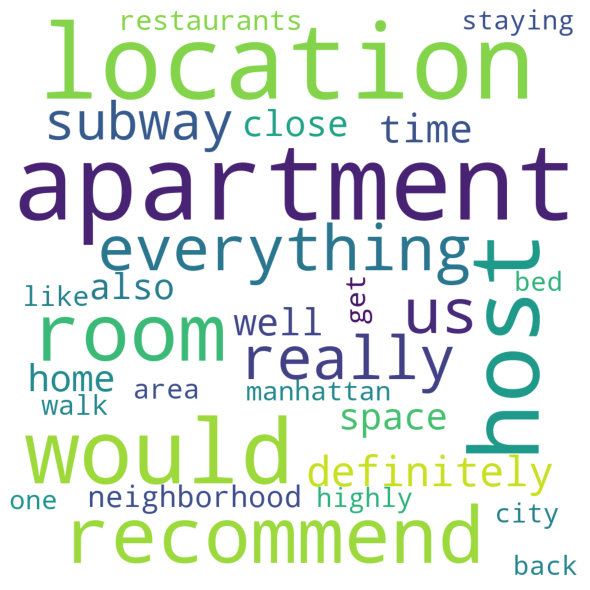

In [25]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_frequencies(top_words)

# plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('word_cloud.jpg', format='jpeg', dpi=300)

plt.show()

